In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
train = pd.read_csv('/content/drive/MyDrive/bike_sharing/bike_train.csv')
test = pd.read_csv('/content/drive/MyDrive/bike_sharing/bike_test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train['tempDate'] = train.datetime.apply(lambda x:x.split())

In [7]:
train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])
train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])
train['minute'] = train.tempDate.apply(lambda x:x[1].split(':')[1])
train['second'] = train.tempDate.apply(lambda x:x[1].split(':')[2])

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"[2011-01-01, 00:00:00]",2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"[2011-01-01, 01:00:00]",2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"[2011-01-01, 02:00:00]",2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"[2011-01-01, 03:00:00]",2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"[2011-01-01, 04:00:00]",2011,01,01,04,00,00


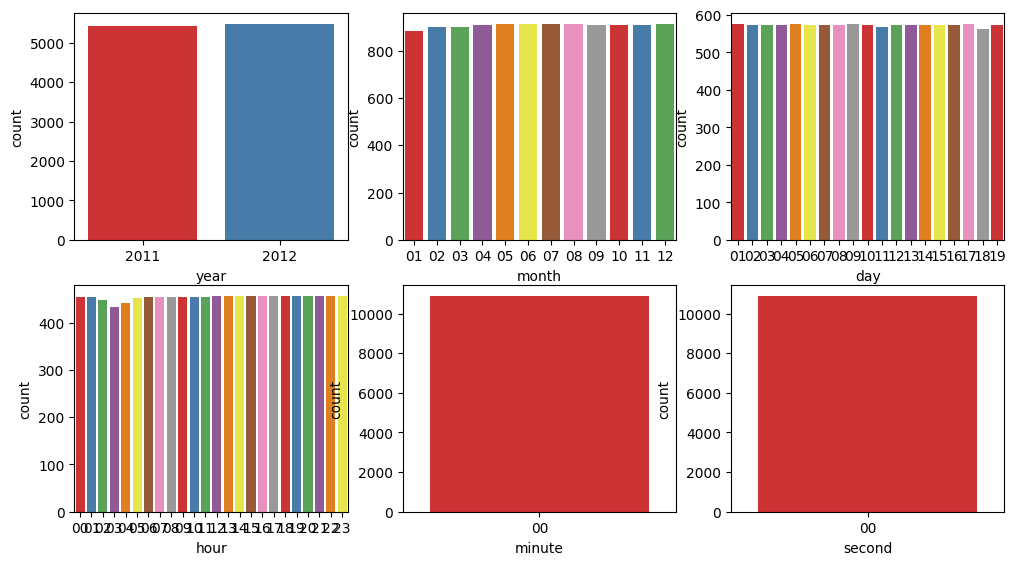

In [9]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(3,3,1)
ax1 = sns.countplot(data=train, x='year', palette='Set1', hue='year')

ax2 = fig.add_subplot(3,3,2)
ax2 = sns.countplot(data=train, x='month', palette='Set1', hue='month')

ax3 = fig.add_subplot(3,3,3)
ax3 = sns.countplot(data=train, x='day', palette='Set1', hue='day')

ax4 = fig.add_subplot(3,3,4)
ax4 = sns.countplot(data=train, x='hour', palette='Set1', hue='hour')

ax5 = fig.add_subplot(3,3,5)
ax5 = sns.countplot(data=train, x='minute', palette='Set1', hue='minute')

ax6 = fig.add_subplot(3,3,6)
ax6 = sns.countplot(data=train, x='second', palette='Set1', hue='second')

In [10]:
from sklearn.model_selection import train_test_split
features = ["year", "month", "day", "hour", "minute", "second", "season", "holiday", "workingday", "weather", "temp", "atemp", "windspeed", "humidity"]
X = train[features]
y = train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
mse

19945.370053753963

In [12]:
rmse = np.sqrt(mse)
rmse

np.float64(141.228078135171)

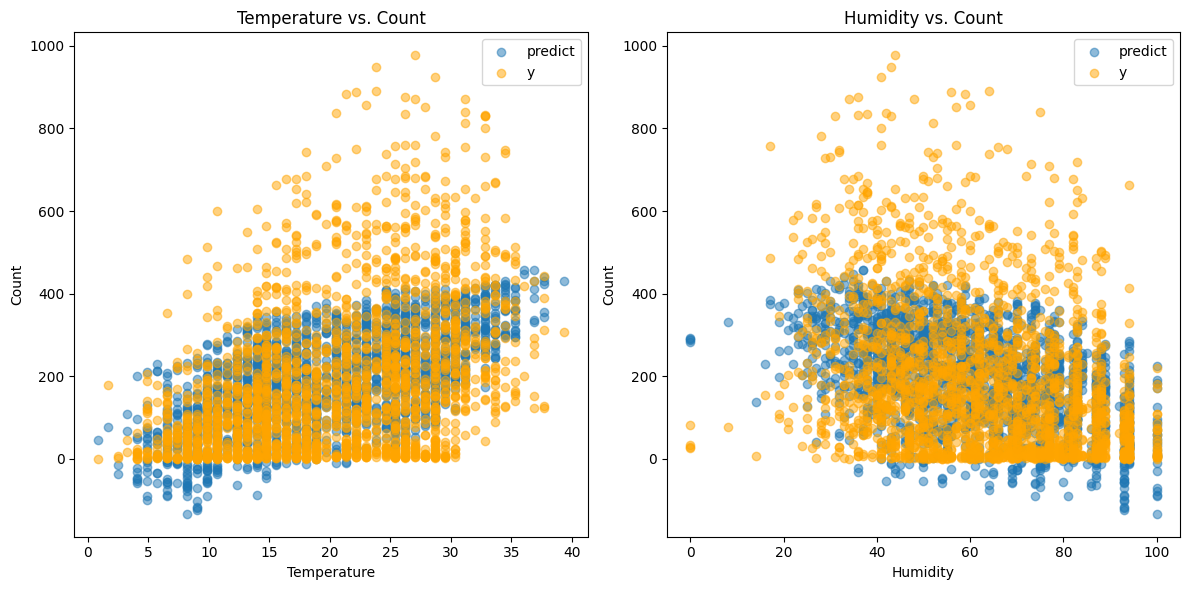

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_pred, alpha=0.5, label='predict')
plt.scatter(X_test['temp'], y_test, color='orange', alpha=0.5, label='y')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()
plt.title('Temperature vs. Count')

plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_pred, alpha=0.5, label='predict')
plt.scatter(X_test['humidity'], y_test, color='orange', alpha=0.5, label='y')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()
plt.title('Humidity vs. Count')

plt.tight_layout()
plt.show()